# RFM - Sanman Malvankar

malvankar.sanman@gmail.com 8097188380 / 9860451634

#### Loading libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

#### Read transactional data from csv 

In [3]:
retail_trans = pd.read_csv('Retail_Data_Transactions.csv' , parse_dates=['trans_date'])
retail_trans = retail_trans.drop_duplicates(subset=None, keep='first')

In [4]:
retail_trans.columns

Index(['customer_id', 'trans_date', 'tran_amount'], dtype='object')

#### Convert datetime to date only for transaction date data

In [5]:
retail_trans['trans_date'] = [x.date() for x in retail_trans['trans_date']]

#### Explore the loaded dataset

In [6]:
retail_trans.dtypes

customer_id    object
trans_date     object
tran_amount     int64
dtype: object

In [7]:
retail_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124994 entries, 0 to 124999
Data columns (total 3 columns):
customer_id    124994 non-null object
trans_date     124994 non-null object
tran_amount    124994 non-null int64
dtypes: int64(1), object(2)
memory usage: 3.8+ MB


In [8]:
retail_trans.head(5)

,customer_id,trans_date,tran_amount
0,CS5295,2013-02-11,35
1,CS4768,2015-03-15,39
2,CS2122,2013-02-26,52
3,CS1217,2011-11-16,99
4,CS1850,2013-11-20,78


#### Finding min and max date to see data timeline

In [9]:
print(retail_trans['trans_date'].min())

2011-05-16


In [10]:
print(retail_trans['trans_date'].max())

2015-03-16


#### current date for recency

In [14]:
current_date = datetime.date.today()
print(current_date)

2019-08-31


#### since the dataset is old and we dont have recent data lets assume the current date of analysis is 31st of March 2016

In [15]:
current_date = datetime.date(2015,3,31)

#### creating month + year key for grouping data at monthly + customer level

In [17]:
retail_monthly = retail_trans.copy(deep = True)
retail_monthly['month_year_key'] = [str(x.month)+'-'+str(x.year) for x in retail_monthly['trans_date']]

#### grouping data at customer + monthly level

In [18]:
retail_monthly_group = retail_monthly.groupby(['customer_id','month_year_key']).agg({'trans_date':['max','min'],'customer_id':'count','tran_amount':'sum'})
retail_monthly_group.columns = ['max_trans_date','min_trans_date','frequency','monetary']
retail_monthly_group = retail_monthly_group.reset_index()
retail_monthly_group = retail_monthly_group[['customer_id', 'max_trans_date','min_trans_date', 'frequency', 'monetary']]

In [46]:
retail_monthly_group

,customer_id,max_trans_date,min_trans_date,frequency,monetary
0,CS1112,2015-01-14,2015-01-14,1,39
1,CS1112,2011-10-02,2011-10-02,1,60
2,CS1112,2013-11-13,2013-11-13,1,71
3,CS1112,2012-12-15,2012-12-15,1,76
4,CS1112,2014-12-04,2014-12-04,1,59
5,CS1112,2013-03-01,2013-03-01,1,105
6,CS1112,2012-04-08,2012-04-08,1,56
7,CS1112,2014-04-29,2014-04-29,1,63
8,CS1112,2011-06-15,2011-06-15,1,56
9,CS1112,2012-06-24,2012-06-24,1,52


### calculating recency at monthly levels customer wise and processing it at customer level

In [19]:
unique_customers = retail_monthly_group['customer_id'].unique()
final_monthly_cus_rfm = pd.DataFrame()
for u in unique_customers:
    tmp = retail_monthly_group[retail_monthly_group['customer_id']==u]
    tmp.sort_values(by=['max_trans_date'], inplace=True, ascending=False)
    tmp['min_trans_date'] = tmp['min_trans_date'].shift(1)
    tmp['min_trans_date'] = tmp['min_trans_date'].fillna(current_date)
    tmp['recency_monthly_level'] = (tmp['min_trans_date'] - tmp['max_trans_date'])/np.timedelta64(1, 'D')
    final_monthly_cus_rfm = final_monthly_cus_rfm.append(tmp, ignore_index = True)

In [47]:
final_monthly_cus_rfm

,customer_id,max_trans_date,min_trans_date,frequency,monetary,recency_monthly_level
0,CS1112,2015-01-14,2015-03-31,1,39,76.0
1,CS1112,2014-12-04,2015-01-14,1,59,41.0
2,CS1112,2014-07-16,2014-12-04,1,90,141.0
3,CS1112,2014-04-29,2014-07-16,1,63,78.0
4,CS1112,2013-11-13,2014-04-29,1,71,167.0
5,CS1112,2013-07-01,2013-11-13,1,36,135.0
6,CS1112,2013-03-01,2013-07-01,1,105,122.0
7,CS1112,2012-12-15,2013-03-01,1,76,76.0
8,CS1112,2012-09-16,2012-12-15,1,72,90.0
9,CS1112,2012-07-03,2012-09-16,1,81,75.0


#### creating RFM from above dataframe since first we had to show monthly level RFM values

In [50]:
rfm_df = final_monthly_cus_rfm.groupby('customer_id').agg({'recency_monthly_level':'first','frequency':'sum','monetary':'sum'})
rfm_df.columns = ['recency','frequency','monetary']
rfm_df.head()

,recency,frequency,monetary
customer_id,,,
CS1112,76.0,15,1012
CS1113,50.0,20,1490
CS1114,47.0,19,1432
CS1115,26.0,22,1659
CS1116,218.0,13,857


#### Dividing the dataset into 4 quartiles

In [52]:
quartiles = rfm_df.quantile(q=[0.25,0.50,0.75])
print(quartiles, type(quartiles))

      recency  frequency  monetary
0.25     37.0       14.0     781.0
0.50     68.0       18.0    1227.0
0.75    126.0       22.0    1520.0 <class 'pandas.core.frame.DataFrame'>


#### scoring customers w.r.t. RFM quartiles

In [53]:
rfm_df['r_quartile'] = [1 if x<=quartiles['recency'][0.25] else 2 if x <= quartiles['recency'][0.50] else 3 if x <= quartiles['recency'][0.75] else 4 for x in rfm_df['recency']]
rfm_df['f_quartile'] = [4 if x<=quartiles['frequency'][0.25] else 3 if x <= quartiles['frequency'][0.50] else 2 if x <= quartiles['frequency'][0.75] else 1 for x in rfm_df['frequency']]
rfm_df['m_quartile'] = [4 if x<=quartiles['monetary'][0.25] else 3 if x <= quartiles['monetary'][0.50] else 2 if x <= quartiles['monetary'][0.75] else 1 for x in rfm_df['monetary']]

rfm_df['rfm_score'] = [str(a)+str(b)+str(c) for a,b,c in zip(rfm_df['r_quartile'],rfm_df['f_quartile'],rfm_df['m_quartile'])]

#### Show RFM category wise average monetary value of customers

In [54]:
rfm_df.groupby('rfm_score').agg({'monetary':'mean'})

,monetary
rfm_score,
111,1817.589041
112,1467.318182
113,1142.750000
121,1597.562500
122,1401.095930
123,1025.877193
124,748.200000
132,1301.430000
133,1071.215328


#### Adding up the scores and showing RFM score wise average monetary value of customers

In [55]:
rfm_df['score'] = [a+b+c for a,b,c in zip(rfm_df['r_quartile'],rfm_df['f_quartile'],rfm_df['m_quartile'])]
rfm_df.groupby('score').agg({'monetary':'mean'})

,monetary
score,
3,1817.589041
4,1735.065299
5,1595.800248
6,1466.662252
7,1263.981043
8,1135.974148
9,892.495146
10,818.934871
11,649.339416


#### plotting average monetary,frequency and recency value against score

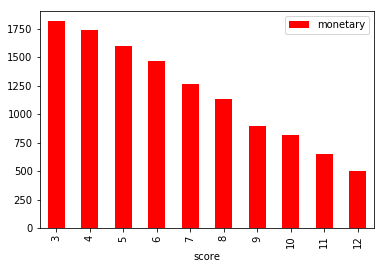

In [26]:
rfm_df.groupby('score').agg({'monetary':'mean'}).plot(kind='bar', colormap='autumn')


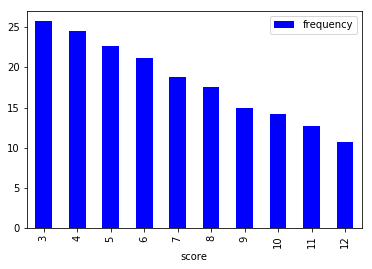

In [27]:
rfm_df.groupby('score').agg({'frequency':'mean'}).plot(kind='bar', colormap='winter')

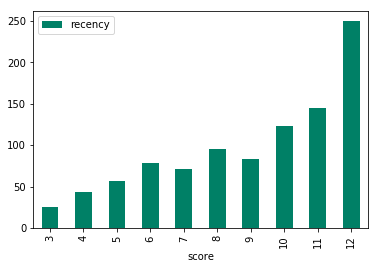

In [28]:
rfm_df.groupby('score').agg({'recency':'mean'}).plot(kind='bar', colormap='summer')

#### Reading campaign responses and mapping them to customer ids on RFM dataframe

In [56]:
response = pd.read_csv('Retail_Data_Response.csv')

In [57]:
response = response.set_index('customer_id')


rfm_df = rfm_df.join(response, how = 'left')
rfm_df = rfm_df.reset_index()
rfm_df = rfm_df.set_index('customer_id')

Text(0, 0.5, 'proportion of Responders')

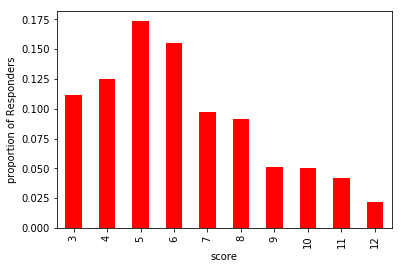

In [37]:
graph = rfm_df.groupby('score').agg('response').mean().plot(kind='bar', colormap='autumn')
graph.set_xlabel("score")
graph.set_ylabel("proportion of Responders")

#### We see that scores with 3,4,5,6 have responded well to campagin more than others

### Attempting K-Means clustering

In [58]:
from sklearn.cluster import KMeans

#### Plotting Elblow graph to identify number of clusters

In [59]:
df = rfm_df[['r_quartile','f_quartile','m_quartile']]

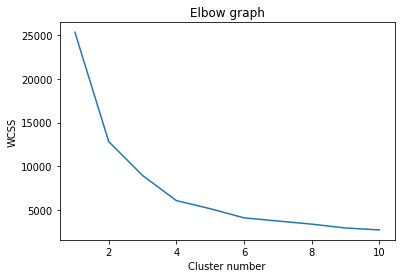

In [60]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow graph')
plt.xlabel('Cluster number')
plt.ylabel('WCSS')
plt.show()

#### We observe that elbow method suggests us 6 clusters thus fitting K-Means with data set

In [61]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=0)
clusters = kmeans.fit_predict(df)

rfm_df['clusters'] = clusters
rfm_df.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,score,response,clusters
customer_id,,,,,,,,,,
CS1112,76.0,15,1012,3,3,3,333,9,0.0,5
CS1113,50.0,20,1490,2,2,2,222,6,0.0,2
CS1114,47.0,19,1432,2,2,2,222,6,1.0,2
CS1115,26.0,22,1659,1,2,1,121,4,1.0,4
CS1116,218.0,13,857,4,4,3,443,11,1.0,1


#### Plotting clusters Recency vs Frequency

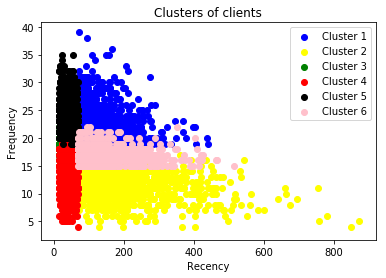

In [63]:
c1 = rfm_df[rfm_df.clusters == 0]
c2 = rfm_df[rfm_df.clusters == 1]
c3 = rfm_df[rfm_df.clusters == 2]
c4 = rfm_df[rfm_df.clusters == 3]
c5 = rfm_df[rfm_df.clusters == 4]
c6 = rfm_df[rfm_df.clusters == 5]

plt.scatter(c1.recency, c1.frequency, c = 'blue', label = 'Cluster 1')
plt.scatter(c2.recency, c2.frequency, c = 'yellow', label = 'Cluster 2')
plt.scatter(c3.recency, c3.frequency, c = 'green', label = 'Cluster 3')
plt.scatter(c4.recency, c4.frequency, c = 'red', label = 'Cluster 4')
plt.scatter(c5.recency, c5.frequency, c = 'black', label = 'Cluster 5')
plt.scatter(c6.recency, c6.frequency, c = 'pink', label = 'Cluster 6')

plt.title('Clusters of clients')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()

#### Plotting clusters Monetary vs Frequency

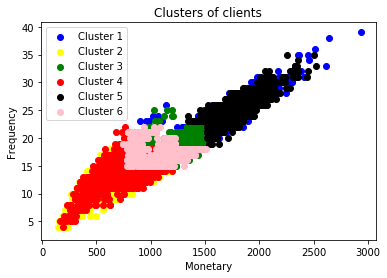

In [64]:
c1 = rfm_df[rfm_df.clusters == 0]
c2 = rfm_df[rfm_df.clusters == 1]
c3 = rfm_df[rfm_df.clusters == 2]
c4 = rfm_df[rfm_df.clusters == 3]
c5 = rfm_df[rfm_df.clusters == 4]
c6 = rfm_df[rfm_df.clusters == 5]

plt.scatter(c1.monetary, c1.frequency, c = 'blue', label = 'Cluster 1')
plt.scatter(c2.monetary, c2.frequency, c = 'yellow', label = 'Cluster 2')
plt.scatter(c3.monetary, c3.frequency, c = 'green', label = 'Cluster 3')
plt.scatter(c4.monetary, c4.frequency, c = 'red', label = 'Cluster 4')
plt.scatter(c5.monetary, c5.frequency, c = 'black', label = 'Cluster 5')
plt.scatter(c6.monetary, c6.frequency, c = 'pink', label = 'Cluster 6')

plt.title('Clusters of clients')
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.legend()

#### Plotting clusters Monetary vs Recency

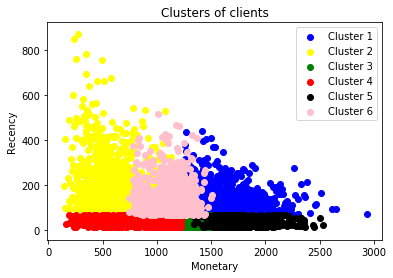

In [65]:
c1 = rfm_df[rfm_df.clusters == 0]
c2 = rfm_df[rfm_df.clusters == 1]
c3 = rfm_df[rfm_df.clusters == 2]
c4 = rfm_df[rfm_df.clusters == 3]
c5 = rfm_df[rfm_df.clusters == 4]
c6 = rfm_df[rfm_df.clusters == 5]

plt.scatter(c1.monetary, c1.recency, c = 'blue', label = 'Cluster 1')
plt.scatter(c2.monetary, c2.recency, c = 'yellow', label = 'Cluster 2')
plt.scatter(c3.monetary, c3.recency, c = 'green', label = 'Cluster 3')
plt.scatter(c4.monetary, c4.recency, c = 'red', label = 'Cluster 4')
plt.scatter(c5.monetary, c5.recency, c = 'black', label = 'Cluster 5')
plt.scatter(c6.monetary, c6.recency, c = 'pink', label = 'Cluster 6')

plt.title('Clusters of clients')
plt.xlabel('Monetary')
plt.ylabel('Recency')
plt.legend()